# Inicialização

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [22]:
ROOT = os.path.abspath('..')
DATA = os.path.join(ROOT, 'data', 'external')
df = pd.read_csv(os.path.join(DATA, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATA, 'test.csv'))
df_target = pd.read_csv(os.path.join(DATA, 'sample_submission.csv'))

In [23]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


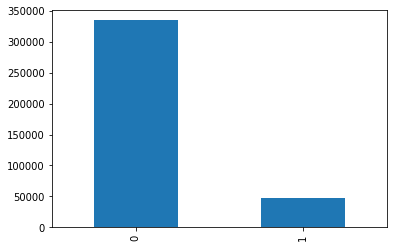

In [48]:
df['Response'].value_counts().plot.bar()

# Pré-Processamento

In [25]:
from sklearn.preprocessing import OrdinalEncoder

Dados de treinamento

In [26]:
df.select_dtypes(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [27]:
encoder = OrdinalEncoder()

In [28]:
df[['Gender', 'Vehicle_Age', 'Vehicle_Damage']] = encoder.fit_transform(df.select_dtypes(include=['object']))

In [29]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

- Gender
    - Male = 1
    - Female = 0
- Vehicle_Age
    - 1-2 Year = 0
    - < 1 Year = 1
    - \> 2 Years = 2
- Vehicle_Damage
    - No = 0
    - Yes = 1

Realizando o SMOTENN

In [49]:
from imblearn.combine import SMOTEENN

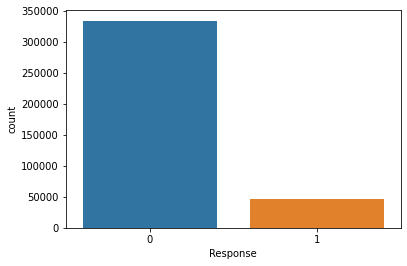

In [54]:
sns.countplot(df['Response']);

In [56]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,217,1
1,2,1.0,76,1,3.0,0,0.0,0.0,33536.0,26.0,183,0
2,3,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,27,1
3,4,1.0,21,1,11.0,1,1.0,0.0,28619.0,152.0,203,0
4,5,0.0,29,1,41.0,1,1.0,0.0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1.0,74,1,26.0,1,0.0,0.0,30170.0,26.0,88,0
381105,381106,1.0,30,1,37.0,1,1.0,0.0,40016.0,152.0,131,0
381106,381107,1.0,21,1,30.0,1,1.0,0.0,35118.0,160.0,161,0
381107,381108,0.0,68,1,14.0,0,2.0,1.0,44617.0,124.0,74,0


In [58]:
sme = SMOTEENN(random_state=42)
X = df.drop(labels=['id', 'Response'], axis=1)
y = df['Response']
X_res, y_res = sme.fit_resample(X, y)

In [62]:
DATA_CSV = os.path.join(ROOT, 'data', 'processed')
df = X_res
df['Response'] = y_res
df.to_csv(os.path.join(DATA_CSV, 'train.csv'), index= False)

Dados de teste

In [34]:
df_test.select_dtypes(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,< 1 Year,No
1,Male,1-2 Year,Yes
2,Male,1-2 Year,Yes
3,Male,< 1 Year,Yes
4,Male,< 1 Year,No
...,...,...,...
127032,Female,< 1 Year,No
127033,Female,1-2 Year,Yes
127034,Male,< 1 Year,No
127035,Male,1-2 Year,No


In [35]:
df_test[['Gender', 'Vehicle_Age', 'Vehicle_Damage']] = encoder.transform(df_test.select_dtypes(include=['object']))

In [36]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

- Gender
    - Male = 1
    - Female = 0
- Vehicle_Age
    - 1-2 Year = 0
    - < 1 Year = 1
    - \> 2 Years = 2
- Vehicle_Damage
    - No = 0
    - Yes = 1

In [37]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1.0,25,1,11.0,1,1.0,0.0,35786.0,152.0,53
1,381111,1.0,40,1,28.0,0,0.0,1.0,33762.0,7.0,111
2,381112,1.0,47,1,28.0,0,0.0,1.0,40050.0,124.0,199
3,381113,1.0,24,1,27.0,1,1.0,1.0,37356.0,152.0,187
4,381114,1.0,27,1,28.0,1,1.0,0.0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0.0,26,1,37.0,1,1.0,0.0,30867.0,152.0,56
127033,508143,0.0,38,1,28.0,0,0.0,1.0,28700.0,122.0,165
127034,508144,1.0,21,1,46.0,1,1.0,0.0,29802.0,152.0,74
127035,508145,1.0,71,1,28.0,1,0.0,0.0,62875.0,26.0,265


In [42]:
df_test = df_test.merge(df_target, how='inner', on='id')

In [44]:
DATA_CSV = os.path.join(ROOT, 'data', 'processed')
df_test.to_csv(os.path.join(DATA_CSV, 'test.csv'), index= False)